# Task 1 Prediction using Supervised ML
## by: Prashant Sharma
### GRIP SEP 2021

In [ ]:
#importing relevant libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error

In [2]:
#loading dataset into dataframe
df = pd.read_csv("data/prediction.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# count of dataset
df.count()

Hours     25
Scores    25
dtype: int64

In [4]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

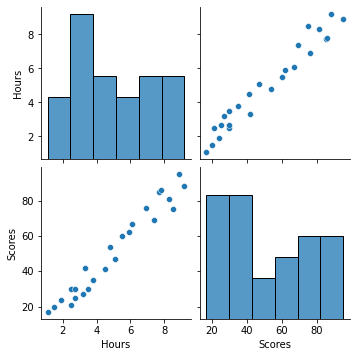

In [7]:
#feature wise plot of dataframe
sns.pairplot(df)

[]

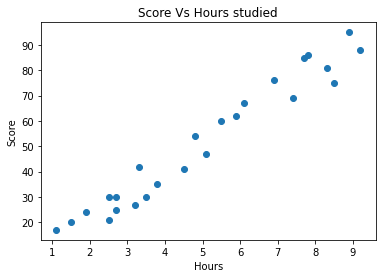

In [8]:
# ploting feature vs target
plt.scatter(df.Hours,df.Scores)
plt.xlabel("Hours")
plt.ylabel("Score")
plt.title("Score Vs Hours studied")
plt.plot()

In [9]:
#Pearsons correlation
corr, _ = pearsonr(df.Hours,df.Scores)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.976


strong Linear correlation 

In [10]:
#preprocessing and fiting the linear model
X = df.Hours
y = df.Scores
X = sm.add_constant(X) #adding constant as student with zero hours of study will probably score some marks
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size = 0.2,random_state = 1234)
model = sm.OLS(y_train,X_train)
results = model.fit()
results.params

const     2.095346
Hours    10.010876
dtype: float64

In [11]:
#printing summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     479.9
Date:                Sat, 11 Sep 2021   Prob (F-statistic):           1.99e-14
Time:                        15:00:02   Log-Likelihood:                -60.417
No. Observations:                  20   AIC:                             124.8
Df Residuals:                      18   BIC:                             126.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0953      2.577      0.813      0.427      -3.319       7.510
Hours         10.0109      0.457     21.906      0.000       9.051      10.971
==============================================================================
Omnibus:                       11.879   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                2.349
Skew:                          -0.246   Prob(JB):                        0.309
Kurtosis:                       1.395   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

we got the R square value of 0.953, which means we are able to capture the 96% variance in the dataset. Both constant & Hours variable are statistically significant.

In [12]:
# Model evaluation
y_pred = results.predict(X_test)
Y_pred_training = results.predict(X_train)
square_err_T = mean_absolute_error(y_train,Y_pred_training )
square_err_V = mean_absolute_error(y_test,y_pred )
print(f"Training MAE: {square_err_T}")
print(f"Validation MAE: {square_err_V}")

Training MAE: 4.621848989638787
Validation MAE: 6.23821168927815


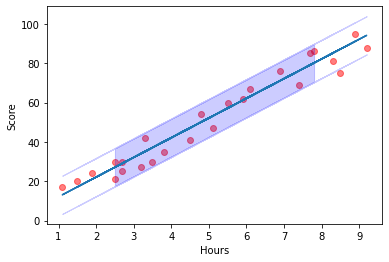

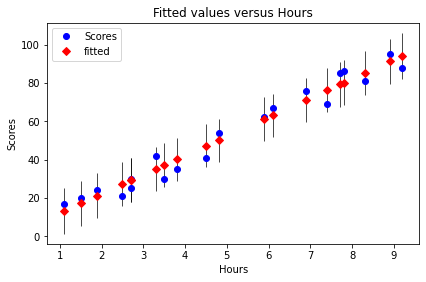

In [13]:
# plotting linear model with confidence interval
linear_line = results.params[0] + results.params[1] * df.Hours
CI = 1.96 * np.std(df.Scores)/np.sqrt(df.count()[1])
plt.scatter(df.Hours,df.Scores , color = "red" , alpha = 0.5)
plt.plot(df.Hours,linear_line)
plt.fill_between(df.Hours,(linear_line-CI),(linear_line + CI), color = "b" , alpha = 0.2)
plt.xlabel("Hours")
plt.ylabel("Score")
fig = sm.graphics.plot_fit(results, "Hours")
fig.tight_layout(pad=1.0)

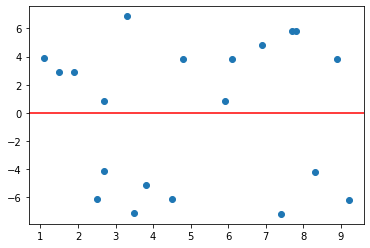

In [14]:
#residuals analysis
plt.scatter(X_train.Hours,results.resid)
plt.axhline(y=0, color='r', linestyle='-')

In [15]:
# Predicting Score for 9.25 hours of study.
y = results.params[0] + results.params[1]*9.25
print(f"predicted score for the student studying for 9.25 hours is {y}")

predicted score for the student studying for 9.25 hours is 94.69595283072873
